In [1]:
## AST425 Rebound Simulation
## Author: Chris Simbulan

In [2]:
## Import Libraries -----------------------------------------------------------------------------------------
import numpy as np
import rebound as reb
import reboundx as rebx
import copy
from itertools import combinations
import random
import os.path
import matplotlib.pyplot as plt
#from __future__ import print_function
import visual as vs
import time as ti

/usr/lib/python2.7/dist-packages/visual/materials.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self.__setattr__(key, value)


In [3]:
sim = reb.Simulation()
seed = 40
## Define units, although these are the default
sim.units = ("AU", "yr", "Msun")
Mj = 9.542e-4 # Mass of Jupiter
Mst = 2.856e-4 # Mass of Saturn
Mnpt = 5.149e-5 # Mass of Neptune
sim.exit_min_peri = 0.1   
    
## Random Seed
random.seed(seed)
   
## Generate five random starting angles
angles = []
for i in range(0,5):
    angles.append(random.random()*2*np.pi)
   
## Add bodies
sim.add(m=1.0, id = 0) #Add solar mass planet
sim.add(m = Mj, a=13.2, e=0, inc = 0, f=angles[0], id = 1)
sim.add(m = Mj, a=32.3, e=0, inc = 0, f=angles[1], id = 2)
sim.add(m = Mj, a=64.2, e=0, inc = 0, f=angles[2], id = 3)
sim.add(m = Mj, a=73.7, e=0, inc = 0, f=angles[3], id = 4)
sim.add(m = Mj, a=91.0, e=0, inc = 0, f=angles[4], id = 5)
sim.move_to_com()

print type(sim.particles)

ps = sim.particles
posi = []
for p in ps:
    posi.append([p.x, p.y])
print posi

<type 'list'>
[[-0.13961267909608963, -0.04208069855231682], [-12.895683049689461, 3.352424965085591], [23.09560475237557, -22.463149229715757], [62.78939997446454, 12.70049423357209], [-14.981699628665785, 72.12758884389854], [88.30623154205136, -21.616857290814863]]


In [4]:
scene = vs.display(title = "HL Tau Seed 40")
tlabel = vs.label(pos = (0, 100, 0), text = "t = 0 yrs", box = False)

class trail:
    
    def __init__(self, planet, size):
        self.t = []
        self.size = size
        for i in range(0, size):
            self.t.append(vs.sphere(pos = planet.pos, radius = 0.5, color = planet.color, opacity = 1.0 - (i/10.0)/2))
            
    def update(self, planet):
        for i in range(self.size -1, -1, -1):
            if i > 0:
                self.t[i].pos = self.t[i - 1].pos
            elif i == 0:
                self.t[i].pos = planet.pos
    
    def delete(self):
        for i in range(0, self.size):
            self.t[i].visible = False
            del self.t[i]
            
class planet_system:
    
    def __init__(self, particles):
        self.planets = []
        self.trails = []
        self.size = len(particles)
        self.colors = [ (255,255,255), (0, 0, 255), (0, 255, 0), (255, 255, 0), (255, 0, 0), (171, 0, 255) ]
        self.radii = [3, 1.5, 1.5, 1.5, 1.5, 1.5]
        for i in range(0, self.size):
            ipos = (particles[i].x, particles[i].y, particles[i].z)
            self.planets.append(vs.sphere(pos = ipos, radius = self.radii[i], color = self.colors[i]))
            self.trails.append(trail(self.planets[i], 20))
    
    def update(self, particles):
        for i in range(0, self.size):
            ipos = (particles[i].x, particles[i].y, particles[i].z)
            self.planets[i].pos = ipos
            self.trails[i].update(self.planets[i])
                
system = planet_system(sim.particles)
        

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


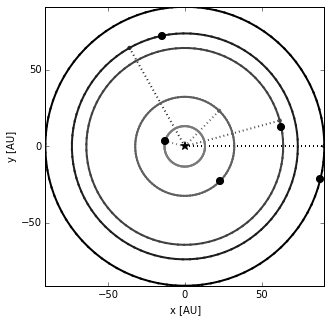

In [5]:
## Plot the orbits
%matplotlib inline
fig = reb.OrbitPlot(sim, unitlabel="[AU]", periastron=True, lw=2)

In [6]:
Noutputs = 100
times = np.linspace(0,1.0e3, Noutputs)
for i,time in enumerate(times):
        sim.integrate(time)
        system.update(sim.particles)
        tlabel.text = "t = {0} yrs".format(time)
        ti.sleep(0.025)

In [8]:
help(sim)

Help on Simulation in module rebound.simulation object:

class Simulation(_ctypes.Structure)
 |  REBOUND Simulation Object.
 |  
 |  This object encapsulated an entire REBOUND simulation. 
 |  It is an abstraction of the C struct reb_simulation.
 |  You can create mutiple REBOUND simulations (the c library is thread safe). 
 |  
 |  Examples
 |  --------
 |  Most simulation parameters can be directly changed with the property syntax:
 |  
 |  >>> sim = rebound.Simulation()
 |  >>> sim.G = 1.   # Sets the graviational constant (default 1)
 |  >>> sim.softening = 1.   # Sets the graviational softening parameter default (0)
 |  >>> sim.dt = 0.1   # Sets the timestep (will change for adaptive integrators such as IAS15).
 |  >>> sim.t = 0.   # Sets the current simulation time (default 0.)
 |  >>> print(sim.N)  # Gets the current number of particles
 |  >>> print(sim.N_active)  # Gets the current number of active particles
 |  
 |  Method resolution order:
 |      Simulation
 |      _ctypes.